# Morphology transformations


In [ ]:
def contrast(img, perc):
  MIN = perc[0]
  MAX = perc[1]

  norm = (img - MIN) / (MAX - MIN)
  norm[norm > 1] = 1
  norm[norm < 0] = 0

  return norm

In [ ]:
from skimage import io
from skimage import img_as_float
from skimage import morphology
from skimage import measure
from skimage import filters
from skimage import feature
from sklearn import metrics

import numpy as np
import matplotlib.pyplot as plt



Simple filter.

In [ ]:
def threshold(img, threshpoint):
  return np.array([[1 if x >= threshpoint else 0 for x in y] for y in img])

In [ ]:
def plot_hist(img):
  histo, x = np.histogram(img, range(0, 256), density=True)
  plt.plot(histo)
  plt.xlim(0,255)

In [ ]:
def loadFile(filename):
    image = io.imread(filename, as_gray=True)
    image = img_as_float(image)
    return image

Proper filtering there:


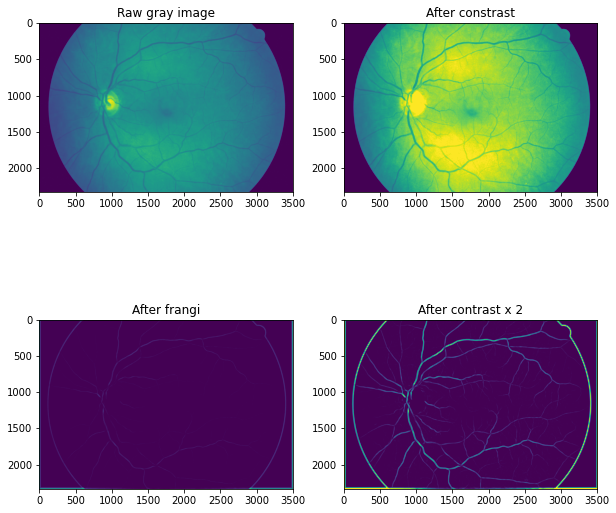

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(10,10))

img = loadFile('09_g.jpg')
ax[0,0].title.set_text('Raw gray image')
ax[0,0].imshow(img)

non_zeros = img[np.nonzero(img)]

img = contrast(img, np.percentile(non_zeros, (2, 98)))
ax[0,1].title.set_text('After constrast')
ax[0,1].imshow(img)

img = filters.frangi(img)
ax[1,0].title.set_text('After frangi')
ax[1,0].imshow(img)

img = contrast(img, np.percentile(img, (2, 98)))
ax[1,1].title.set_text('After contrast x 2')
ax[1,1].imshow(img)

(array([   0,    0,    0, ..., 2335, 2335, 2335]), array([   0,    1,    2, ..., 3501, 3502, 3503]))


/usr/local/lib/python3.6/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


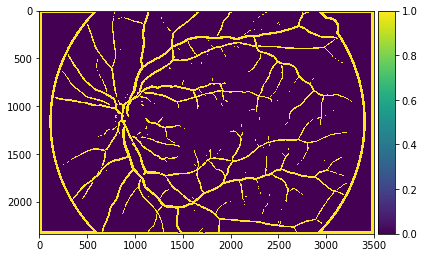

In [ ]:
result = threshold(img, 0.04)
result = morphology.erosion(result)
result = morphology.erosion(result)
for i in range(0,4):
  result = morphology.dilation(result)

print(np.nonzero(result))

io.imshow(result)

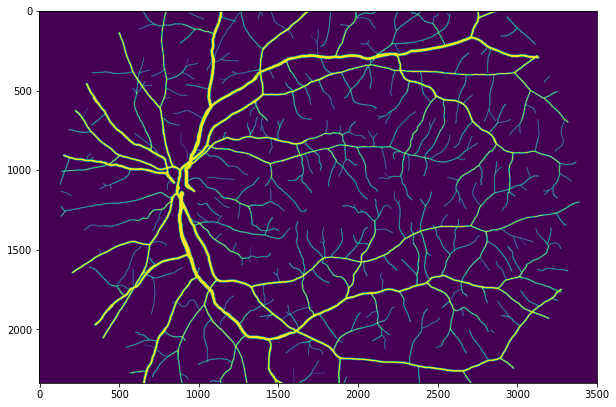

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10,10))

test = loadFile('09_g.tif')
test = test / np.max(test)
ax.imshow(test)

In [ ]:
tn, fp, fn, tp = metrics.confusion_matrix(test.flatten(), result.flatten()).ravel()
(tn, fp, fn, tp)

(6995698, 647703, 137845, 404098)

In [ ]:
# TPR = TP/(TP+FN)
print('Sensitivity: ', tp/(tp + fn))

# TNR = TN/(FP+TN)
print('Specificity: ', tn/(fp + tn))

# ACC = (TP+TN)/(TP+TN+FP+TN)
print('Accuracy: ', (tp+tn)/(tn+fp+fn+tp))

Sensitivity:  0.7456466824001786
Specificity:  0.9152598430986416
Accuracy:  0.9040299344780134


# KNN Classifier

In [ ]:
from skimage import io
from skimage import img_as_float

In [ ]:
img = loadFile('01_h.jpg')
test = loadFile('01_h.tif')
print(img.shape)
non_zeros = img[np.nonzero(img)]
img = contrast(img, np.percentile(non_zeros, (2, 98)))

(2336, 3504)


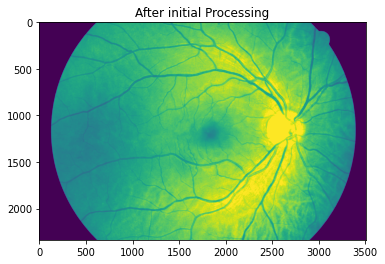

In [ ]:
plt.title('After initial Processing')
plt.imshow(img)

Splitting part of the image into 5x5 pixel blocks

In [ ]:
windowsize_r = 5
windowsize_c = 5

blocks = np.empty((0,5,5), float)
test_blocks = np.empty((0,5,5), float)
for r in range(0,img.shape[0] - windowsize_r, 2*windowsize_r):
    for c in range(0,img.shape[1] - windowsize_c, 2*windowsize_c):
        window = img[r:r+windowsize_r,c:c+windowsize_c]
        test_window = test[r:r+windowsize_r,c:c+windowsize_c]
        blocks = np.append(blocks, np.array([window]), axis = 0)
        test_blocks = np.append(test_blocks, np.array([test_window]), axis = 0)
print(blocks.shape)
print(test_blocks.shape)

(81900, 5, 5)
(81900, 5, 5)


Extracting target variable from expert mask

In [ ]:
label = np.empty((0), int)
for r in range (0, test_blocks.shape[0], 1):
    label = np.append(label, np.array(test_blocks[r][2][2]))
print(label.shape)

(81900,)


Calculating variance for each block

In [ ]:
from scipy import ndimage
color_variance = np.empty((0), float)
for r in range (0, blocks.shape[0], 1):
    color_variance = np.append(color_variance, ndimage.variance(blocks[r])) 
print(color_variance.shape)
print(color_variance)

(81900,)
[5.47008545e-07 9.65309197e-08 4.02212166e-07 ... 7.98732993e-07
 2.31735698e-06 7.40758825e-06]


Calculating Hu moments based on central moments

In [ ]:
import cv2

hu_moments_0 = np.empty((0), float)
hu_moments_1 = np.empty((0), float)
hu_moments_2 = np.empty((0), float)
hu_moments_3 = np.empty((0), float)
hu_moments_4 = np.empty((0), float)
hu_moments_5 = np.empty((0), float)
hu_moments_6 = np.empty((0), float)
for r in range (0, blocks.shape[0], 1):
    moments = moments = cv2.moments(blocks[r])
    hu_moments_item = np.array(cv2.HuMoments(moments)).flatten()
    hu_moments_0 = np.append(hu_moments_0, hu_moments_item[0])
    hu_moments_1 = np.append(hu_moments_1, hu_moments_item[1])
    hu_moments_2 = np.append(hu_moments_2, hu_moments_item[2])
    hu_moments_3 = np.append(hu_moments_3, hu_moments_item[3])
    hu_moments_4 = np.append(hu_moments_4, hu_moments_item[4])
    hu_moments_5 = np.append(hu_moments_5, hu_moments_item[5])
    hu_moments_6 = np.append(hu_moments_6, hu_moments_item[6])
    
print(hu_moments_1.shape)
print(hu_moments_2.shape)
print(hu_moments_3.shape)
print(hu_moments_4.shape)
print(hu_moments_5.shape)
print(hu_moments_6.shape)

(81900,)
(81900,)
(81900,)
(81900,)
(81900,)
(81900,)


Creating feature array 

In [ ]:
features = np.array(list(zip( hu_moments_0, hu_moments_1, hu_moments_2, hu_moments_3, hu_moments_4, hu_moments_5, hu_moments_6, color_variance)))
print(features.shape)
print(label.shape)

(81900, 8)
(81900,)


Spliting dataset into train and test datasets

In [ ]:
from sklearn.model_selection import train_test_split
print(features.shape)
print(label.shape)
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.30, stratify = label)

(81900, 8)
(81900,)


Training and testing the data

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

Metrics for test data


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[21428   643]
 [ 1441  1058]]
              precision    recall  f1-score   support

         0.0       0.94      0.97      0.95     22071
         1.0       0.62      0.42      0.50      2499

    accuracy                           0.92     24570
   macro avg       0.78      0.70      0.73     24570
weighted avg       0.90      0.92      0.91     24570



In [ ]:
from sklearn.model_selection import cross_val_score

knn = KNeighborsClassifier(n_neighbors = 3)
scores = cross_val_score(knn, features, label, cv=5, scoring='accuracy')
print(scores)

print(scores.mean())


[0.92313797 0.91343101 0.90360195 0.91391941 0.91562882]
0.9139438339438339


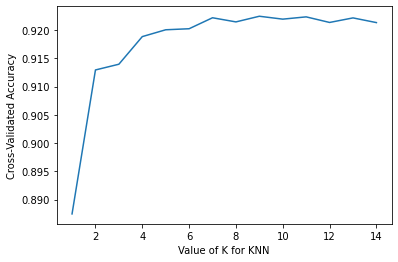

In [ ]:
import matplotlib.pyplot as plt 
%matplotlib inline

k_range = range(1, 15)
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, features, label, cv=5, scoring='accuracy')
    k_scores.append(scores.mean())

plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV

knn2 = KNeighborsClassifier()

param_grid = {'n_neighbors': np.arange(1, 15)}

knn_gscv = GridSearchCV(knn2, param_grid, cv=5)

knn_gscv.fit(features, label)

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
knn_gscv.best_params_

{'n_neighbors': 9}

In [ ]:
knn_gscv.best_score_

0.9224297924297925

Building final Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=9)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[21677   394]
 [ 1519   980]]
              precision    recall  f1-score   support

         0.0       0.93      0.98      0.96     22071
         1.0       0.71      0.39      0.51      2499

    accuracy                           0.92     24570
   macro avg       0.82      0.69      0.73     24570
weighted avg       0.91      0.92      0.91     24570



In [ ]:
from matplotlib import pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix

(2336, 3504)


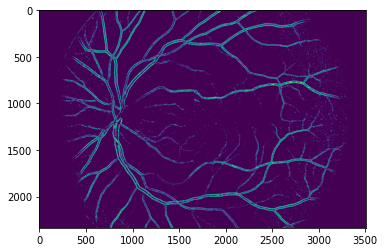

In [ ]:

img = loadFile('06_h.jpg')
test = loadFile('06_h.tif')
print(img.shape)
non_zeros = img[np.nonzero(img)]
img = contrast(img, np.percentile(non_zeros, (2, 98)))

result = np.zeros(img.shape)

windowsize_r = 5
windowsize_c = 5

features = np.empty((0), float)
for r in range(0,img.shape[0] - windowsize_r, 1):
  for c in range(0,img.shape[1] - windowsize_c, 1):
      window = img[r:r+windowsize_r,c:c+windowsize_c]
      sum_window = sum(map(sum, window)) 
      if sum_window > 12.0:
        moments = cv2.moments(window)
        features = np.array(cv2.HuMoments(moments)).flatten()
        features = np.append(features, ndimage.variance(window))
            
        predicted = classifier.predict([features])
        result[r+2][c+2] = predicted
        
plt.imshow(result)
plt.show()  